In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

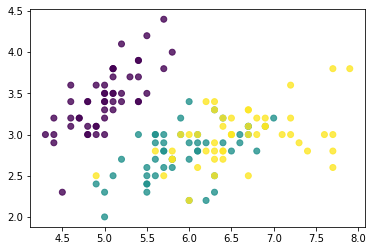

In [10]:
iris = load_iris()
Features = iris.data
target = iris.target

plt.scatter(Features[:, 0], Features[:, 1], c=target, alpha=0.8)

# Train test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Features_train, Features_test, target_train, target_test = train_test_split(Features, target, test_size=0.2, random_state=5)

print('Train set : ' , Features_train.shape)
print('Test set ', Features_test.shape )

Train set :  (120, 4)
Test set  (30, 4)


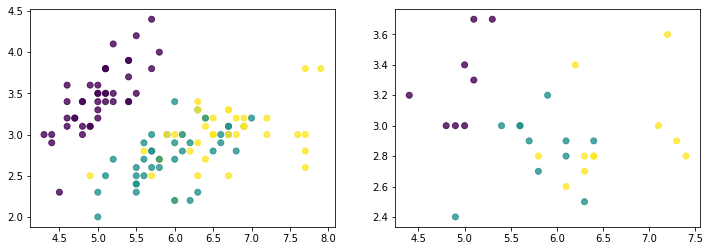

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(Features_train[:, 0], Features_train[:, 1], c=target_train, alpha=0.8)
plt.subplot(122)
plt.scatter(Features_test[:,0], Features_test[:,1], c=target_test, alpha=0.8)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Features_train, target_train)

print('train score :' , model.score(Features_train, target_train))
print('test score : ', model.score(Features_test, target_test))

train score : 1.0
test score :  0.9


# 2. Validation Set and Cross Validation